In [100]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

import matplotlib.pyplot as plt
from matplotlib.pyplot import gray
from sklearn.metrics import confusion_matrix

import numpy as np
import seaborn as sns
np.random.seed(0)



In [101]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [102]:
print('Training sampples :',len(x_train))
print('Testing samples' , len(x_test))
print('shape', x_train[0].shape)

Training sampples : 60000
Testing samples 10000
shape (28, 28)


In [103]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

0


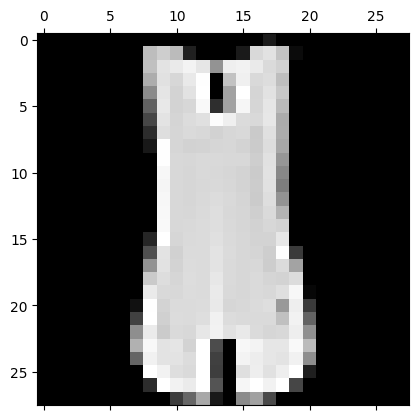

In [104]:
plt.matshow(x_train[4],cmap='gray')
print(y_train[4])

<p>Label	Description</br>
0	T-shirt/top</br>
1	Trouser</br>
2	Pullover</br>
3	Dress</br>
4	Coat</br>
5	Sandal</br>
6	Shirt</br>
7	Sneaker</br>
8	Bag</br>
9	Ankle boot</br>
<p>

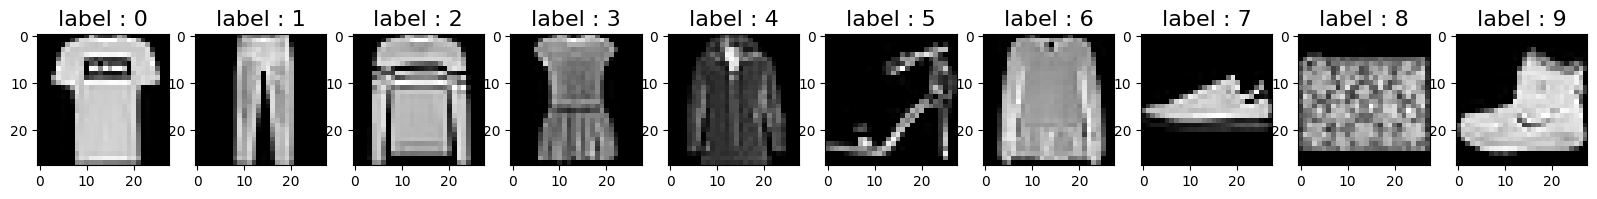

In [105]:
num_classes = 10

_, ax = plt.subplots(1, num_classes, figsize=(20, 20))

for i in range(0,num_classes):
    sample = x_train[y_train == i][0]   # first image of class i
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'label : {i}',fontsize=16)
  



In [106]:
for i in range(10):
    print(y_train[i])

9
0
0
3
0
2
7
2
5
5


In [107]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [108]:
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [109]:
x_train,x_test=x_train/255,x_test/255

In [110]:
x_train=x_train.reshape(len(x_train),28*28)
x_test=x_test.reshape(len(x_test),28*28)

In [111]:
print(x_train.shape)

(60000, 784)


In [112]:
model = Sequential()

model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy' ,optimizer='adam',metrics=['accuracy'])
model.summary()

c:\Users\agasy\miniconda3\envs\MLenv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
batch_size=512
epoch=20
model.fit(x=x_train,y=y_train,batch_size=batch_size,epochs=epoch)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7437 - loss: 0.7409
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8397 - loss: 0.4557
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8593 - loss: 0.4002
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8677 - loss: 0.3713
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8726 - loss: 0.3514
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8800 - loss: 0.3322
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8856 - loss: 0.3191
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8873 - loss: 0.3104
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8919 - loss: 0.2993
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8959 - loss: 0.2870
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8969 - loss: 0.2830
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

In [114]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print('testloss: {},Testaccuracy :{}'.format(test_loss,test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8865 - loss: 0.3242
testloss: 0.32416805624961853,Testaccuracy :0.8865000009536743


In [115]:
y_pred= model.predict(x_test)
y_pred_classes = np.argmax(y_pred , axis=1) #goes to every row and pics high probablity of that index 
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[2.9551179e-06 1.8147423e-07 9.3360109e-07 ... 2.7595670e-03
  1.0334466e-06 9.9630249e-01]
 [1.9585248e-06 2.7923551e-11 9.9973029e-01 ... 1.5490707e-12
  6.3034605e-10 1.5228986e-11]
 [9.6220809e-08 9.9999988e-01 1.9411729e-10 ... 4.1771999e-16
  1.6226442e-10 2.4673395e-16]
 ...
 [4.7127524e-04 1.0365019e-08 2.9893860e-04 ... 1.5048187e-06
  9.9894887e-01 2.8301399e-08]
 [2.7914902e-07 9.9999070e-01 1.8693653e-08 ... 1.7963044e-12
  2.8998184e-07 2.6730217e-12]
 [2.1873899e-07 2.1895971e-08 2.6913617e-07 ... 9.0357535e-06
  1.9536394e-05 5.3782596e-08]]
[9 2 1 ... 8 1 5]


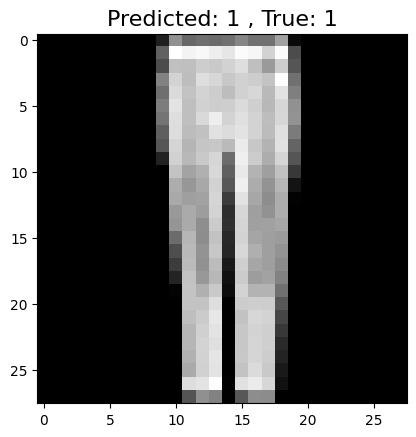

In [124]:
random_index = np.random.choice(len(x_test))
X_sample = x_test[random_index]
y_true = np.argmax(y_test,axis=1)
y_sample_true = y_true[random_index]
y_sample_pred_class = y_pred_classes[random_index]

plt.title(f"Predicted: {y_sample_pred_class} , True: {y_sample_true}", fontsize=16)

plt.imshow(X_sample.reshape(28,28) , cmap = 'grey')